<a href="https://colab.research.google.com/github/maxwiedmann/DSI_project_5__ee_water_levels/blob/master/ee_image_to_water_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regarding** GIS Stack Exchange question: https://gis.stackexchange.com/q/350771/68792

How to use `ee.Image.sampleRectangle()` to transfer 2-D image array to Python and convert to 2-D numpy array.

In [1]:
import ee
import numpy as np
import matplotlib.pyplot as plt

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=Q4LwewSUvxdhsrKX8wmzbSSMfLbU9NXsFEPNCLdllU8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/3AEuG0RImO6K25geBBwU9JvJppv0iMaNqkVOmZDP5REQlC1UbBWvL18

Successfully saved authorization token.


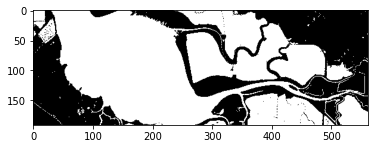

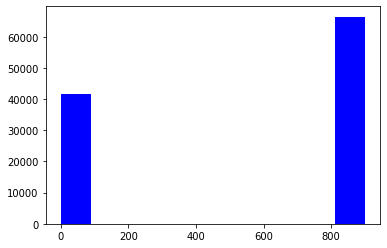

In [135]:
# Define an image.
img = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')\
    .select(['B3','B4', 'B5', 'B6'])
  

#img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
#  .select(['B3','B4', 'B5', 'B6'])

# Define an area of interest.

aoi = ee.Geometry.Polygon(
        [[[-122.14, 37.5],
          [-122.14, 37.45],
          [-121.95, 37.45],
          [-121.95, 37.5]]], None, False)

water_thresh = 0
ndwi = img.normalizedDifference(['B3','B5']).rename('NDWI')

img = img.addBands(waterArea)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.

band_arrs = img.sampleRectangle(region=aoi, defaultValue = 0)

ndwi_np = np.array(band_arrs.getInfo()['properties']['NDWI'])

plt.imshow(ndwi_np, cmap = 'gray');
plt.show();

plt.hist(ndwi_np.ravel(), color = 'b');
plt.show()